In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sb

In [80]:
oil_df=pd.read_csv("Crude_Oil Price.csv")
oil_df['Date'] = pd.to_datetime(pd.Series(oil_df['Date'])).dt.strftime('%Y-%m-%d')
oil_df = oil_df.sort_values('Date').reset_index(drop=True)
oil_df.head()

,Date,Open,High,Low,Oil_Close,Adj Close**,Volume
0,2015-01-02,53.76,55.11,52.03,52.69,52.69,"268,708"
1,2015-01-05,52.61,52.73,49.68,50.04,50.04,"375,782"
2,2015-01-06,50,50.37,47.55,47.93,47.93,"451,642"
3,2015-01-07,48,49.31,46.83,48.65,48.65,"460,083"
4,2015-01-08,48.78,49.65,47.73,48.79,48.79,"362,081"


In [81]:
oil_df.dtypes

Date           object
Open           object
High           object
Low            object
Oil_Close      object
Adj Close**    object
Volume         object
dtype: object

In [82]:
gold_df.dtypes

Date           object
Gold_Close    float64
dtype: object

In [83]:
btc_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [84]:
gold_df=pd.read_csv("Gold Price.csv")
gold_df['Date'] = pd.to_datetime(pd.Series(gold_df['Date'])).dt.strftime('%Y-%m-%d')
gold_df = gold_df.sort_values('Date').reset_index(drop=True)
gold_df.head()

,Date,Open,High,Low,Gold_Close,Adj Close**,Volume
0,2015-01-02,"1,184.00","1,194.50","1,169.50",1186,"1,186.00",138
1,2015-01-05,"1,180.30","1,206.90","1,180.10",1203.9,"1,203.90",470
2,2015-01-06,"1,203.50","1,220.00","1,203.50",1219.3,"1,219.30",97
3,2015-01-07,"1,219.20","1,219.20","1,210.60",1210.6,"1,210.60",29
4,2015-01-08,"1,207.00","1,215.70","1,206.30",1208.4,"1,208.40",92


In [85]:
gold_df.dtypes

Date           object
Open           object
High           object
Low            object
Gold_Close     object
Adj Close**    object
Volume         object
dtype: object

In [86]:
btc_df=pd.read_csv("dataset2.csv")
btc_df = btc_df.sort_values('Date').reset_index(drop=True)
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [87]:
oil_df.shape

(1933, 7)

In [88]:
gold_df.shape

(1933, 7)

In [89]:
btc_df.shape

(2800, 7)

In [90]:
oil_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Oil_Close      0
Adj Close**    0
Volume         0
dtype: int64

In [91]:
gold_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Gold_Close     0
Adj Close**    0
Volume         0
dtype: int64

In [92]:
btc_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [93]:
print(type(gold_df['High'][41]))

<class 'str'>


In [94]:
gold_df.dtypes

Date           object
Open           object
High           object
Low            object
Gold_Close     object
Adj Close**    object
Volume         object
dtype: object

In [95]:
gold_df.drop(["Open","High","Low","Adj Close**","Volume"], axis=1, inplace=True)
gold_df.head()

,Date,Gold_Close
0,2015-01-02,1186
1,2015-01-05,1203.9
2,2015-01-06,1219.3
3,2015-01-07,1210.6
4,2015-01-08,1208.4


In [96]:
oil_df.drop(["Open","High","Low","Adj Close**","Volume"], axis=1, inplace=True)
oil_df.head()

,Date,Oil_Close
0,2015-01-02,52.69
1,2015-01-05,50.04
2,2015-01-06,47.93
3,2015-01-07,48.65
4,2015-01-08,48.79


In [97]:
oil_df.shape

(1933, 2)

In [98]:
print(oil_df["Oil_Close"])

0       52.69
1       50.04
2       47.93
3       48.65
4       48.79
        ...  
1928    94.89
1929    92.52
1930    93.06
1931    97.01
1932    91.64
Name: Oil_Close, Length: 1933, dtype: object


In [99]:
idx = 0
for val in oil_df['Oil_Close']:
    if val == '-':
        oil_df.drop(oil_df.index[idx], axis=0, inplace=True)
        idx-=1
    idx+=1
oil_df.shape

(1929, 2)

In [100]:
oil_df['Oil_Close'] = oil_df['Oil_Close'].astype(float)

In [101]:
type(gold_df["Gold_Close"][20])

str

In [102]:
idx = 0
for val in gold_df['Gold_Close']:
    if val == '-':
        gold_df.drop(gold_df.index[idx], axis=0, inplace=True)
        idx-=1
    idx+=1
gold_df.shape

(1927, 2)

In [103]:
gold_df['Gold_Close'] = gold_df['Gold_Close'].astype(float)

In [104]:
gold_df.head()

,Date,Gold_Close
0,2015-01-02,1186.0
1,2015-01-05,1203.9
2,2015-01-06,1219.3
3,2015-01-07,1210.6
4,2015-01-08,1208.4


In [105]:
oil_df.head()

,Date,Oil_Close
0,2015-01-02,52.69
1,2015-01-05,50.04
2,2015-01-06,47.93
3,2015-01-07,48.65
4,2015-01-08,48.79


In [106]:
mergedRes = pd.merge(oil_df, gold_df, on ='Date')

In [107]:
mergedRes.head()

,Date,Oil_Close,Gold_Close
0,2015-01-02,52.69,1186.0
1,2015-01-05,50.04,1203.9
2,2015-01-06,47.93,1219.3
3,2015-01-07,48.65,1210.6
4,2015-01-08,48.79,1208.4


In [108]:
result = pd.merge(btc_df, mergedRes, on ='Date')

In [109]:
result.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Oil_Close,Gold_Close
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,52.69,1186.0
1,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,50.04,1203.9
2,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,47.93,1219.3
3,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,48.65,1210.6
4,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,48.79,1208.4


In [110]:
result.shape

(1927, 9)

In [111]:
result.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Oil_Close     0
Gold_Close    0
dtype: int64

In [112]:
result.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Oil_Close     float64
Gold_Close    float64
dtype: object

In [113]:
y = result["Close"]
result.drop(["Close","Date"], axis=1, inplace=True)
X=result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Adj Close,0.444
Low,0.338
High,0.132
Open,0.086
Volume,0.000
Oil_Close,0.000
Gold_Close,0.000


In [116]:
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
2795,2022-08-27,20262.480469,20340.775391,19890.523438,20041.738281,20041.738281,30116729776
2796,2022-08-28,20041.035156,20139.054688,19616.814453,19616.814453,19616.814453,24366810591
2797,2022-08-29,19615.154297,20357.462891,19600.785156,20297.994141,20297.994141,32637854078
2798,2022-08-30,20298.611328,20542.644531,19617.640625,19796.808594,19796.808594,34483360283


In [117]:
oil_df

,Date,Oil_Close
0,2015-01-02,52.69
1,2015-01-05,50.04
2,2015-01-06,47.93
3,2015-01-07,48.65
4,2015-01-08,48.79
...,...,...
1928,2022-08-24,94.89
1929,2022-08-25,92.52
1930,2022-08-26,93.06
1931,2022-08-29,97.01


In [118]:
gold_df

,Date,Gold_Close
0,2015-01-02,1186.0
1,2015-01-05,1203.9
2,2015-01-06,1219.3
3,2015-01-07,1210.6
4,2015-01-08,1208.4
...,...,...
1928,2022-08-24,1747.8
1929,2022-08-25,1757.7
1930,2022-08-26,1736.1
1931,2022-08-29,1736.6


In [119]:
result.corr()

,Open,High,Low,Adj Close,Volume,Oil_Close,Gold_Close
Open,1.000000,0.999436,0.999012,0.998507,0.722816,0.581313,0.763089
High,0.999436,1.000000,0.998986,0.999380,0.726552,0.578871,0.762578
Low,0.999012,0.998986,1.000000,0.999277,0.714754,0.582282,0.763849
Adj Close,0.998507,0.999380,0.999277,1.000000,0.722190,0.578766,0.763352
Volume,0.722816,0.726552,0.714754,0.722190,1.000000,0.254495,0.765688
Oil_Close,0.581313,0.578871,0.582282,0.578766,0.254495,1.000000,0.389712
Gold_Close,0.763089,0.762578,0.763849,0.763352,0.765688,0.389712,1.000000


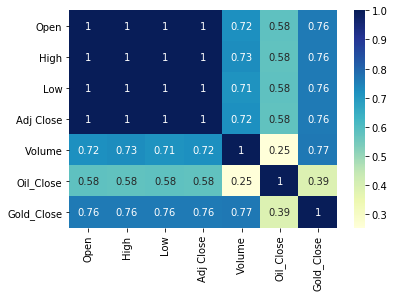

In [121]:
# plotting correlation heatmap
dataplot = sb.heatmap(result.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()